In [23]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
file_path = '11b_zeroshot_drinks_cognitivethemes.json'

with open(file_path, 'r') as file:
    data = json.load(file)

In [3]:
labels = data[0]['labels']

In [4]:
for row in data:
    row['score_by_label'] = dict(zip(row['labels'], row['scores']))

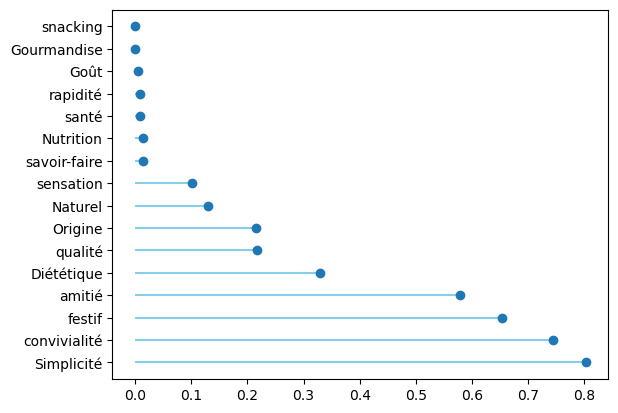

In [18]:
# plot of single ad

labels = data[0]['labels']
scores = data[0]['scores']

plt.hlines(y=range(1, len(labels) + 1), xmin=0,xmax=scores, color='skyblue')
plt.plot(scores, range(1, len(labels)+1), 'o')
plt.yticks(range(1, len(labels)+1), labels)
plt.show()

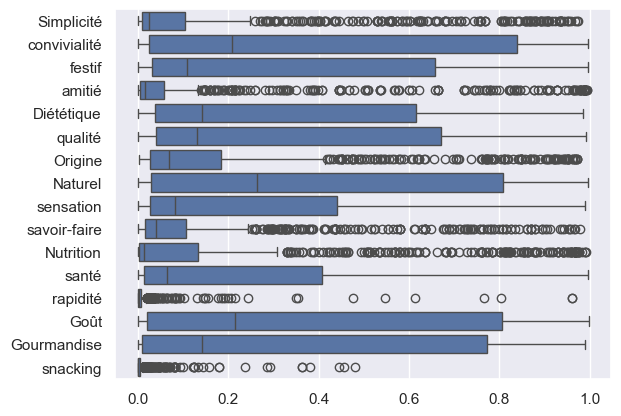

In [31]:
# all ads in boxplot

labels_bp_list = list(itertools.chain(*[x['labels'] for x in data]))
scores_bp_list = list(itertools.chain(*[x['scores'] for x in data]))

sns.set_theme(style="darkgrid")
sns.boxplot(y=labels_bp_list, x=scores_bp_list)
plt.show()

<AxesSubplot:>

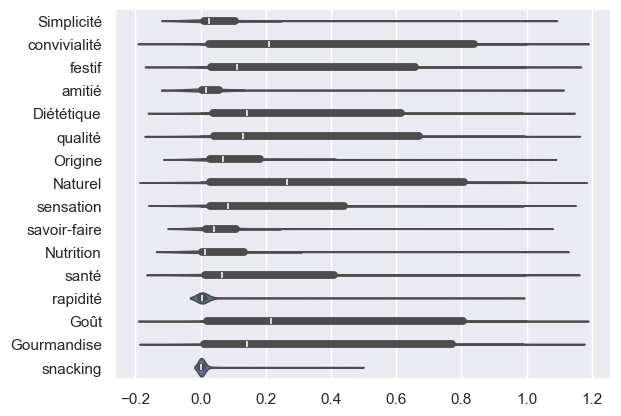

In [33]:
# Same but with violin plot

sns.violinplot(y=labels_bp_list, x=scores_bp_list)

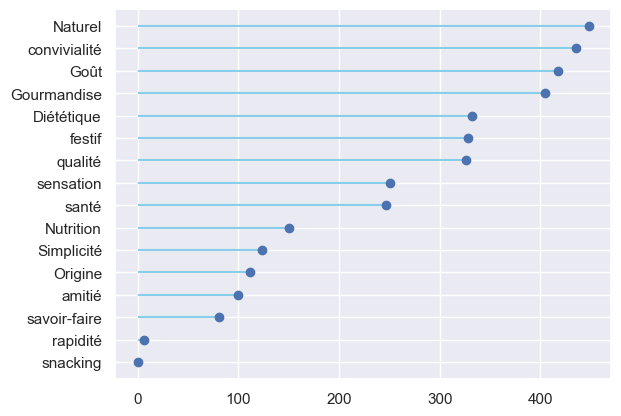

In [51]:
bool_scores_bp_list = [1 if x > .5 else 0 for x in scores_bp_list]
# labels_bp_list

# Dictionary to hold the sums
label_sums = {}

# Iterate through labels and values
for label, value in zip(labels_bp_list, bool_scores_bp_list):
    if label in label_sums:
        label_sums[label] += value
    else:
        label_sums[label] = value

label_sums = {k: v for k, v in sorted(label_sums.items(), key=lambda item: item[1])}

plt.hlines(y=range(1, len(label_sums.keys()) + 1), xmin=0,xmax=label_sums.values(), color='skyblue')
plt.plot(label_sums.values(), range(1, len(labels)+1), 'o')
plt.yticks(range(1, len(label_sums.keys())+1), label_sums.keys())
plt.show()

In [ ]:
# TODO : analyse temporelle